## Task-3 K-Means Clustering for 'iris' dataset
(Unsupervised Machine Learning)

Here the classification of iris dataset will be formed

In [1]:
# importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt

**Importing the datset**

In [2]:
iris_url = './Iris.csv'
iris_data = pd.read_csv(iris_url)
iris_data = iris_data.iloc[:,1:]
iris_data.head(7)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa


In [3]:
# Determining basic statistics for iris_data
iris_data.iloc[:,1:].describe()

,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000
mean,3.054000,3.758667,1.198667
std,0.433594,1.764420,0.763161
min,2.000000,1.000000,0.100000
25%,2.800000,1.600000,0.300000
50%,3.000000,4.350000,1.300000
75%,3.300000,5.100000,1.800000
max,4.400000,6.900000,2.500000


From above table we can observe that the basic statistics are not determined for species column because it is not a dominant colomn with it's data type among those that are under analysis.
To find the statistics for such categorical variable under analysis we can use 'describe()' method for it separately as shown below

In [4]:
iris_data.iloc[:,-1].describe()

count                150
unique                 3
top       Iris-virginica
freq                  50
Name: Species, dtype: object

In [5]:
species = iris_data.iloc[:,-1]

In [6]:
species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
plt.style.use('seaborn')

In [8]:
#  Finding the optimum number of clusters for K-means classification

x = iris_data.iloc[:, [0, 1, 2, 3]].values # selecting the data excluding the last column

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    k_means = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    k_means.fit(x)
    wcss.append(k_means.inertia_)
    


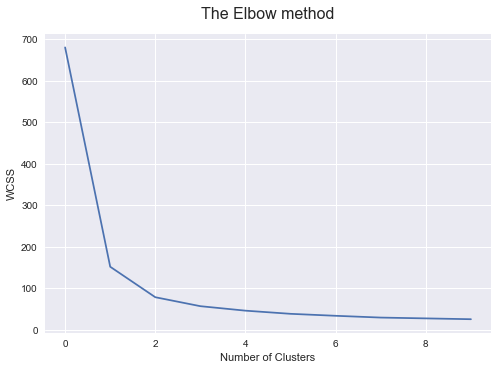

In [9]:
# plotting the results onto a line graph
plt.plot(range(len(wcss)), wcss)
plt.title('The Elbow method',
          fontdict = { 'fontsize': 16 } , pad = 15)
# this method tells about the optimal number of clusters from the plot,
# i.e., when the plot no longer has steepness and becomes flat
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From the above plot we can see that the elbow is occuring at **3** clusters

In [10]:
# Applying Kmeans to the dataset / Creating the Kmeans Classfier

# Initailizing the classifier
k_means = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

# predicting the 
pred_kmeans = k_means.fit_predict(x)

**Now we can plot for various combination of features (columns)** to identify the clustering made by KMeans algorithm

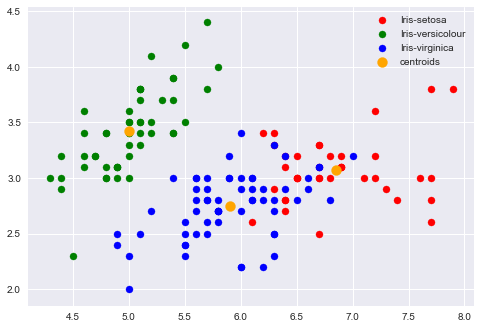

In [11]:
# Visualizing the Clusters - On the first two columns
plt.scatter(x[pred_kmeans == 0, 0], x[pred_kmeans == 0, 1], s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[pred_kmeans == 1, 0], x[pred_kmeans == 1, 1], s = 50, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[pred_kmeans == 2, 0], x[pred_kmeans == 2, 1], s = 50, c = 'blue', label = 'Iris-virginica')

# plotting the centroids of the clusters
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s = 100, c = 'orange', label = 'centroids')

plt.legend()

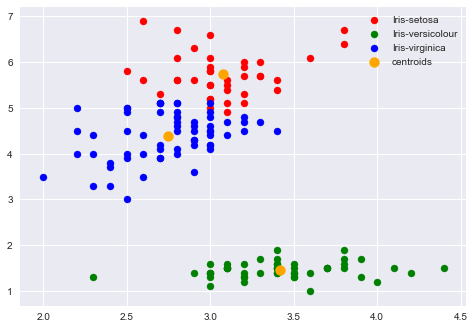

In [12]:
# Visualizing the Clusters - On the 2nd and 3rd columns
plt.scatter(x[pred_kmeans == 0, 1], x[pred_kmeans == 0, 2], s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[pred_kmeans == 1, 1], x[pred_kmeans == 1, 2], s = 50, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[pred_kmeans == 2, 1], x[pred_kmeans == 2, 2], s = 50, c = 'blue', label = 'Iris-virginica')

# plotting the centroids of the clusters
plt.scatter(k_means.cluster_centers_[:, 1], k_means.cluster_centers_[:, 2], s = 100, c = 'orange', label = 'centroids')

plt.legend()

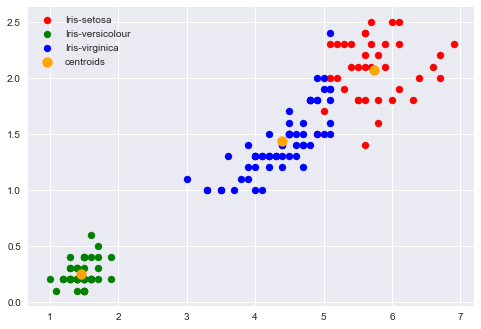

In [13]:
# Visualizing the Clusters - On the last two columns
plt.scatter(x[pred_kmeans == 0, 2], x[pred_kmeans == 0, 3], s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[pred_kmeans == 1, 2], x[pred_kmeans == 1, 3], s = 50, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[pred_kmeans == 2, 2], x[pred_kmeans == 2, 3], s = 50, c = 'blue', label = 'Iris-virginica')

# plotting the centroids of the clusters
plt.scatter(k_means.cluster_centers_[:, 2], k_means.cluster_centers_[:, 3], s = 100, c = 'orange', label = 'centroids')

plt.legend()

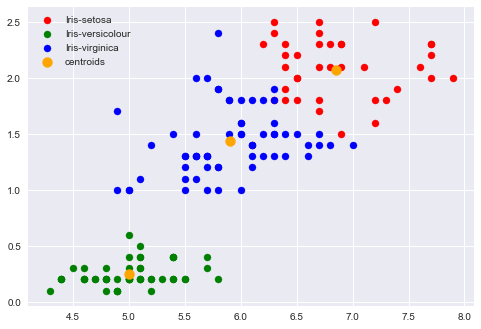

In [14]:
# Visualizing the Clusters - On the first and last columns
plt.scatter(x[pred_kmeans == 0, 0], x[pred_kmeans == 0, 3], s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[pred_kmeans == 1, 0], x[pred_kmeans == 1, 3], s = 50, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[pred_kmeans == 2, 0], x[pred_kmeans == 2, 3], s = 50, c = 'blue', label = 'Iris-virginica')

# plotting the centroids of the clusters
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 3], s = 100, c = 'orange', label = 'centroids')

plt.legend()

By observing the above plots for different combination of columns it is evident that 'versisolor' species is more linearly separable and other two species are less separable i.e., has overlapping to some extent.